In [1]:
import numpy as np
import matplotlib.pyplot as plt

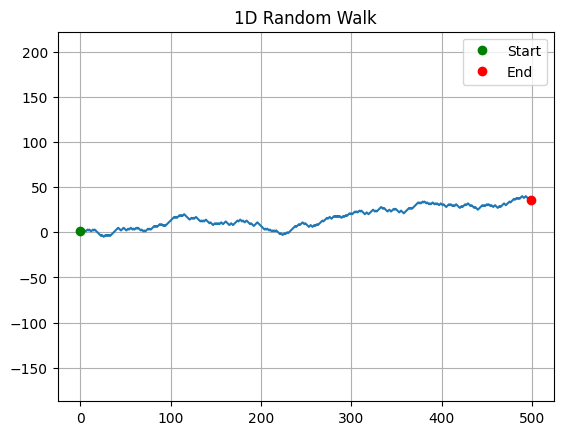

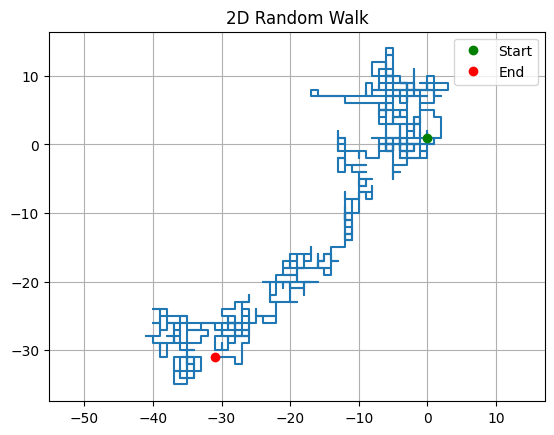

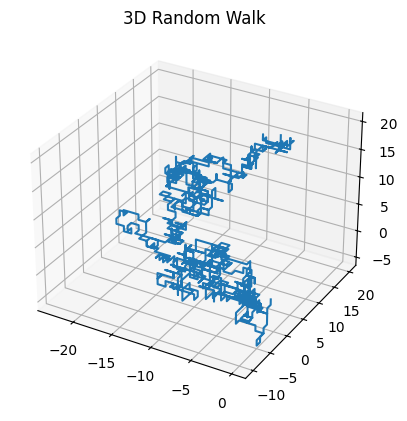

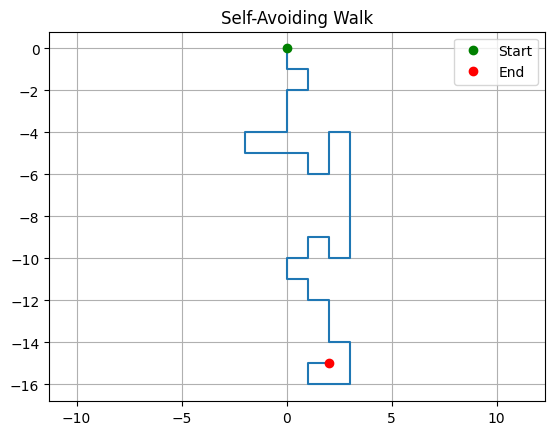

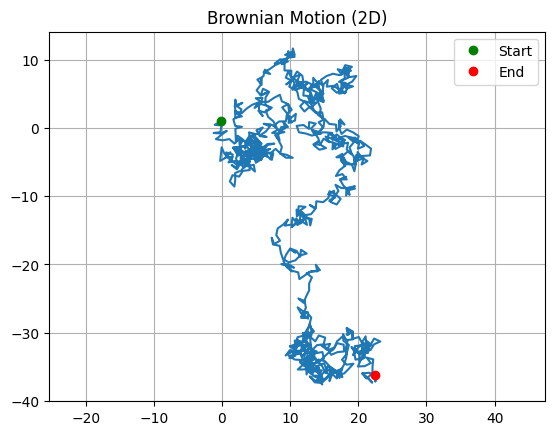

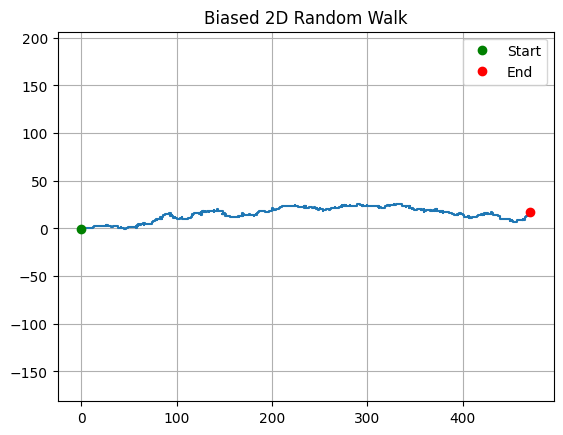

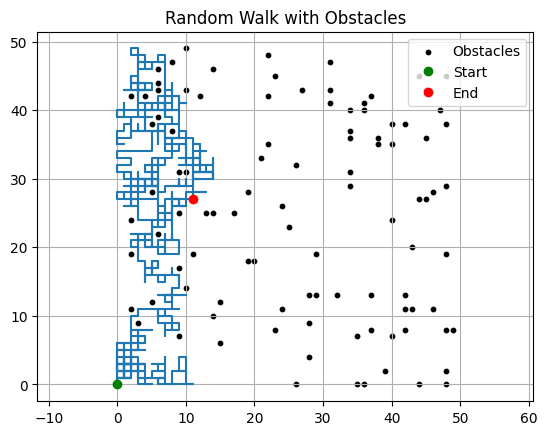

Simulated avg. distance: 28.03
Theoretical avg. distance: 31.62


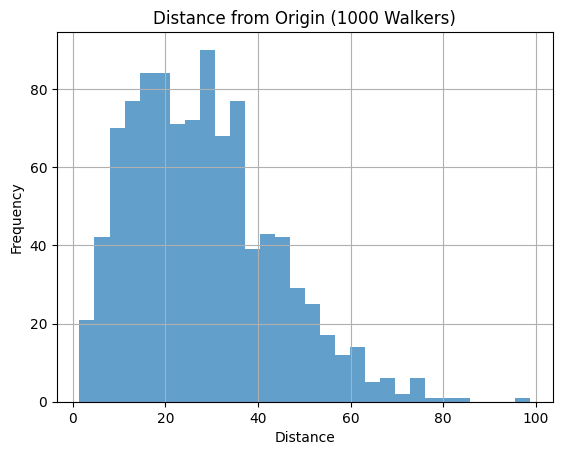

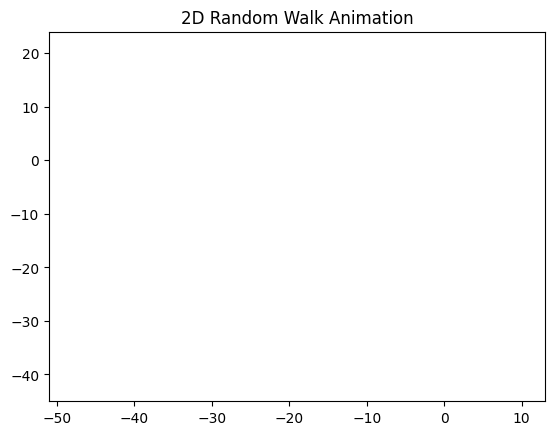

PDF saved to: random_walk_report.pdf


<Figure size 640x480 with 0 Axes>

In [17]:
# ---------------------- 1D Random Walk ----------------------
def random_walk_1d(n_steps=1000):
    steps = np.random.choice([-1, 1], size=n_steps)
    return np.cumsum(steps)


# ---------------------- 2D Random Walk ----------------------
def random_walk_2d(n_steps=1000, bias=None):
    # bias: dictionary with weights for 'R', 'L', 'U', 'D'
    directions = ['R', 'L', 'U', 'D']
    if bias:
        probs = [bias.get(d, 0.25) for d in directions]
    else:
        probs = [0.25] * 4

    steps = np.random.choice(directions, size=n_steps, p=probs)
    dx = np.where(steps == 'R', 1, np.where(steps == 'L', -1, 0))
    dy = np.where(steps == 'U', 1, np.where(steps == 'D', -1, 0))
    return np.cumsum(dx), np.cumsum(dy)


# ---------------------- 3D Random Walk ----------------------
def random_walk_3d(n_steps=1000):
    directions = np.random.choice(['X+', 'X-', 'Y+', 'Y-', 'Z+', 'Z-'], size=n_steps)
    dx = np.where(directions == 'X+', 1, np.where(directions == 'X-', -1, 0))
    dy = np.where(directions == 'Y+', 1, np.where(directions == 'Y-', -1, 0))
    dz = np.where(directions == 'Z+', 1, np.where(directions == 'Z-', -1, 0))
    return np.cumsum(dx), np.cumsum(dy), np.cumsum(dz)


# ---------------------- Self-Avoiding Walk ----------------------
def self_avoiding_walk_2d(n_steps=1000):
    visited = set()
    x = y = 0
    path = [(x, y)]
    visited.add((x, y))
    directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]

    for _ in range(n_steps):
        np.random.shuffle(directions)
        for dx, dy in directions:
            new_pos = (x + dx, y + dy)
            if new_pos not in visited:
                x, y = new_pos
                path.append(new_pos)
                visited.add(new_pos)
                break
        else:
            break
    path = np.array(path)
    return path[:, 0], path[:, 1]


# ---------------------- Brownian Motion (continuous steps) ----------------------
def brownian_motion_2d(n_steps=1000, step_size=1.0):
    angles = 2 * np.pi * np.random.rand(n_steps)
    dx = step_size * np.cos(angles)
    dy = step_size * np.sin(angles)
    return np.cumsum(dx), np.cumsum(dy)


# ---------------------- Grid with Obstacles ----------------------
def random_walk_with_obstacles(grid_size=(50, 50), n_steps=1000, n_obstacles=100):
    grid = np.zeros(grid_size, dtype=int)
    obstacles = set()
    while len(obstacles) < n_obstacles:
        ox, oy = np.random.randint(0, grid_size[0]), np.random.randint(0, grid_size[1])
        if (ox, oy) != (0, 0):
            obstacles.add((ox, oy))
            grid[ox, oy] = -1

    x, y = 0, 0
    path = [(x, y)]
    directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]

    for _ in range(n_steps):
        np.random.shuffle(directions)
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < grid_size[0] and 0 <= ny < grid_size[1] and grid[nx, ny] != -1:
                x, y = nx, ny
                path.append((x, y))
                break
    path = np.array(path)
    return path[:, 0], path[:, 1], obstacles


# ---------------------- Multiple Walkers ----------------------
def multiple_walkers(n_walkers=100, n_steps=1000):
    distances = []
    for _ in range(n_walkers):
        x, y = random_walk_2d(n_steps)
        dist = np.sqrt(x[-1] ** 2 + y[-1] ** 2)
        distances.append(dist)
    return distances


# ---------------------- Expected Distance Comparison ----------------------
def expected_vs_simulated(n_walkers=1000, n_steps=1000):
    distances = multiple_walkers(n_walkers, n_steps)
    avg_distance = np.mean(distances)
    theoretical = np.sqrt(n_steps)
    print(f"Simulated avg. distance: {avg_distance:.2f}")
    print(f"Theoretical avg. distance: {theoretical:.2f}")
    return distances, avg_distance, theoretical


# ---------------------- Plotting ----------------------
def plot_2d(x, y, title="2D Random Walk"):
    plt.plot(x, y)
    plt.plot(x[0], y[0], 'go', label='Start')
    plt.plot(x[-1], y[-1], 'ro', label='End')
    plt.title(title)
    plt.axis('equal')
    plt.grid(True)
    plt.legend()
    plt.show()


def plot_3d(x, y, z):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot(x, y, z)
    ax.set_title("3D Random Walk")
    plt.show()


def plot_histogram(data, title="Histogram"):
    plt.hist(data, bins=30, alpha=0.7)
    plt.title(title)
    plt.xlabel("Distance")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()



# ---------------------- Example Runs ----------------------
if __name__ == "__main__":
    # 1D Walk
    plot_2d(range(len(pos := random_walk_1d(500))), pos, title="1D Random Walk")

    # 2D Walk
    x2d, y2d = random_walk_2d(1000)
    plot_2d(x2d, y2d, title="2D Random Walk")

    # 3D Walk
    x3d, y3d, z3d = random_walk_3d(1000)
    plot_3d(x3d, y3d, z3d)

    # Self-Avoiding
    x_saw, y_saw = self_avoiding_walk_2d(500)
    plot_2d(x_saw, y_saw, title="Self-Avoiding Walk")

    # Brownian Motion
    x_b, y_b = brownian_motion_2d(1000)
    plot_2d(x_b, y_b, title="Brownian Motion (2D)")

    # Biased Random Walk
    bias = {'R': 0.6, 'L': 0.1, 'U': 0.15, 'D': 0.15}
    x_bias, y_bias = random_walk_2d(1000, bias=bias)
    plot_2d(x_bias, y_bias, title="Biased 2D Random Walk")

    # Walk with Obstacles
    x_obs, y_obs, obstacles = random_walk_with_obstacles()
    plt.scatter(*zip(*obstacles), color='black', s=10, label='Obstacles')
    plot_2d(x_obs, y_obs, title="Random Walk with Obstacles")

    # Distance Stats
    dists, avg_dist, theory = expected_vs_simulated()
    plot_histogram(dists, title="Distance from Origin (1000 Walkers)")


